# Máxima Verosimilitud

La técnica de Estimación por Máxima Verosimilitud (Maximum Likelihood Estimation, MLE), responde a la pregunta:

- Dada una serie de datos experimentales y un modelo que los ajusta, ¿cuál es el conjunto de parámetros del modelo que tienen la mayor probabilidad de ajustar a los datos?

- Ejemplo 1:

Lanzamos una moneda 100 veces y obtenemos que 55 veces cae águila $(A)$. Encontremos la estimación de máxima verosimilitud (MLE) para la probabilidad $p$ de obtener $A$ en una sola tirada.

De entrada sabemos que, si la moneda es justa, la probabilidad de obtener $A$ en un tiro es de 1/2. Sin embargo, si no sabemos si la moneda es justa (dado a que no es uniforme, es un poco más pesada de un lado, etc), no podemos saber el valor de $p$ a priori, más allá de una estimación "a ojo". Por lo cual es recomendable, entonces, realizar muchos tiros para obtener una distribución y un valor medio.

Una manera de hacer esto es lanzar la moneda una cantidad N de veces y la probabilidad de obtener águila sería:
$$
P(A) = p = \frac{n_{A}}{N} = 0.55.
$$

Sin embargo, ésta definición no contempla el hecho de que obtener n_A veces águila, está condicionada al valor de $p$. Es decir, $P(n_A | p)$. Así que otra forma de hacer es preguntarse cuál es la probabilidad de obtener $n_A$ dado que se realizaron N tiros, y dado que existe una probabilidad $p$ de obtener $A$ en un tiro.

$$
P(n_A | p) = {N\choose n_A} p^{n_A} (1 - p)^{N - n_A}.
$$

Esto se lee como: "La probabilidad de obtener $n_A$ veces águila, dada que la probabilidad de obtener $A$ en un tiro individual es $p$".

De aquí tenemos:

- Experimento: Realizar N tiros y contar el número de águilas.
- Datos: Obtener el número de resultados donde obtenemos águila, i.e., $n_A$.
- Parámetro de interés: Nos interesa saber el valor de $p$.
- Función de verosimilitud (likelihood function): esta es la función que nos dice la probabilidad de obtener $n_A$ veces águila, dada que la probabilida de obtener $A$ en un tiro individual es $p$, i.e., $P(datos | p) = P(n_A | p)$.

Dados los datos obteniedos, la estimación por máxima verosimilitud para el parámetro $p$ es el valor de $p$ que maximisa la función de verosimilitud $P(datos | p)$. Esto es, la MLE es el valor de $p$ para el cual los datos son más posibles.

En este ejemplo, la función es:

$$
P(55 A | p) = {100 \choose 55}p^{55}(1-p)^{45}.
$$

Para maximizar la función, derivamos respecto de $p$ e igualamos a cero:
$$
\frac{\mathrm{d}P}{\mathrm{d}p} = {100 \choose 55}(55 p^{54}(1 - p)^{45} - 45p^{55}(1-p)^{44}) ) 0.
$$

De aquí obtenemos que la MLE de $p$ es $\hat{p} = 0.55$, que ya sabíamos desde antes, dada la simpleza del problema, pero esta sería la forma correcta de calcularla.

### Log likelihood

A veces la forma más sencilla de obtener la MLE, es maximizando el logaritmo de la función, y no la función en sí. A esto se le conoce como Log Likelihood.

# Ajuste de un modelo con Mínimos Cuadrádos y con Maximum Likelihood

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generemos datos sintéticos de los cuales confiamos en sus
barras de error. Esto significa, que el error asocidado, obtenido de la mediciones, es lo suficientemente grande, en comparación con la dispersión de datos, tal que un ajuste normal pasa a través de todas las barras de error

Text(0, 0.5, 'y')

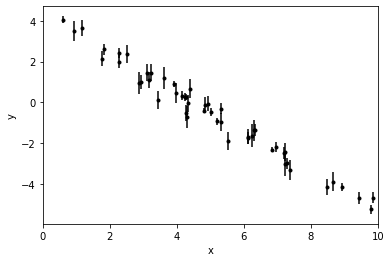

In [2]:
np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
#plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

## Estimación por Mínimos Cuadrados (LSE)

Hagamos un ajuste "rápido" usando mínimos cuadrados.

Estimación por mínimos cuadrados:
m = -0.972 ± 0.016
b = 4.399 ± 0.091


Text(0, 0.5, 'y')

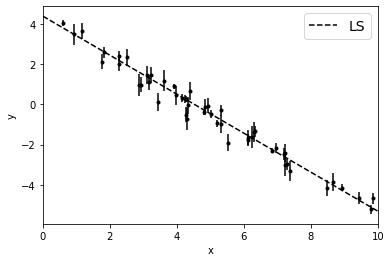

In [3]:
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr ** 2))
print("Estimación por mínimos cuadrados:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

m_ls  = w[0]
dm_ls = np.sqrt(cov[0, 0])
b_ls  = w[1]
db_ls = np.sqrt(cov[1, 1])

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
#plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="Real")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

Como podemos ver, el ajuste por mínimos cuadrados es bastante bueno, y pasa a través de la mayoría de las barras de error.

## Estimación por Máxima Verosimilitud (MLE)

La solución por mínimos cuadrados usada anteriormente de hecho utiliza la estimación por máxima verosimilitud, y asume que las barras de error son correctas, son independientes y son Gaussianas. Esto no siempre será así.

Para tener esto en consideración (la confiabilidad en los errores) debemos encontrar la función de verosimilitud que lo optimice. Pero debemos suponer algo de entrada: la forma funcional de dicha función de verosimilitud.

Lo más sencillo es asumir una forma Gaussiana, dado a los teoremas de números grandes, central del límite, etc, usando como valor medio el modelo que queremos ajustar, y de desviación estándar a los errores experimentales que tenemos. 

$$
    p(y|x,\sigma,m,b) = \left( \frac{1}{\sqrt{2\pi \sigma_n^2}} \right)^n \exp{{\sum_{n=1}^N \frac{(y_n - model_n)^2}{2\sigma_n^2}}}.
$$

Lo más fácil siempre es usar el logaritmo natural de dicha función:

$$
    \ln p(y|x,\sigma,m,b) = -\frac{1}{2} \sum_{n=i}^N \left[ \frac{(y_n - model_n)^2}{\sigma_n^2} + \ln (2\pi \sigma_n^2) \right].
$$

Estas funciones se leen como: "La probabilidad de obtener los datos $y$ dado un modelo $model$ con parámetros $m$ y $b$, los datos dependientes $x$ y la varianza asociada a los errores medidos $\sigma^2$.

In [4]:
# Definimos nuestro modelo a ajustar a los datos

def fit_model(x,*args):
    m = args[0]
    b = args[1]
    return m * x + b

In [5]:
# Definimos el logaritmo de la función de verosimilitud
# (Log likelihood) a partir de una Gaussiana.

def log_likelihood(theta, x, y, yerr):
    m, b = theta
    model = fit_model(x,m,b)
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Estimación por Máxima Verosimilitud:
m = -0.972
b = 4.399


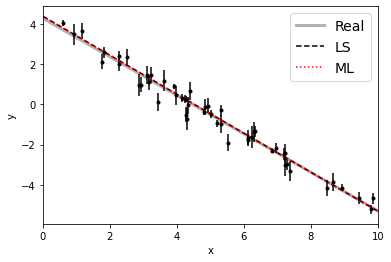

In [6]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_ls, b_ls]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml = soln.x

print("Estimación por Máxima Verosimilitud:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="Real")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":r", label="ML")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

Como podemos ver, dado a la confianza en los errores, no hay diferencia alguna entre Mínimos Cuadrados (LS) y Máxima Verosimilitud (ML).

## Datos sin confianza en los errores

Generemos unos datos sintéticos pero ahora donde no confiamos
en que las barras de error son correctas.

Generemos ahora una serie de datos sintéticos para los cuales no podemos confiar en los errores experimentales, dado que la dispersión de los datos es mucho más grande que el tamaño de las barras de error (por decirlo de forma burda).

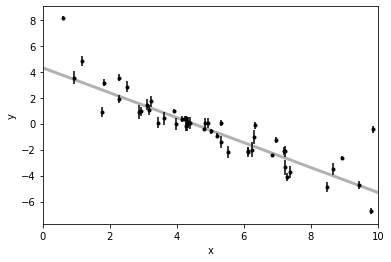

In [7]:
np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534 # Subestimación en los errores

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

Como podemos ver en la gráfica anterior, la mayoría de las barras de error no cruzan la línea, por lo que no podemos confiar en los errores que tenemos y debemos hacer un ajuste que tome en cuenta esto.

Si repetimos la estimación por Mínimos Cuadrados (LS).

Estimación por mínimos cuadrados:
m = -1.104 ± 0.016
b = 5.441 ± 0.091


Text(0, 0.5, 'y')

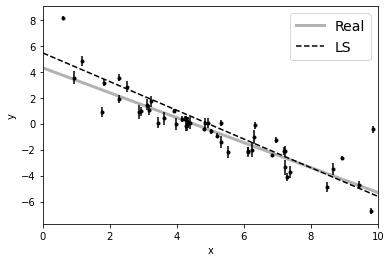

In [8]:
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr ** 2))
print("Estimación por mínimos cuadrados:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

m_ls  = w[0]
dm_ls = np.sqrt(cov[0, 0])
b_ls  = w[1]
db_ls = np.sqrt(cov[1, 1])

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="Real")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

Encontramos una diferencia grande a la curva real, aunque esto no lo podríamos saber de entrada, porque es muy probable que no sepamos cual es dicha curva (recordemos que los datos sintéticos representan datos experimentales).

Si ahora repetimos la estimación pero usando Máxima Verosimilitud, ahora nuestra función de verosimilitud tendrá un factor extra $f$, que considerará esta subestimación en los errores, y que entra como otro parámetro a nuestro modelo

$$
    \ln p(y|x,s,m,b,f) = -\frac{1}{2} \sum_{n=i}^N \left[ \frac{(y_n - model_n)^2}{s_n^2} + \ln (2\pi s_n^2) \right],
$$

donde $s_n^2 = \sigma_n^2 + f^2(model_n)^2$.

In [9]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = fit_model(x,m,b)
    sigma2 = yerr ** 2 + model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Maximum likelihood estimates:
m = -1.003
b = 4.528
f = 0.454


Text(0, 0.5, 'y')

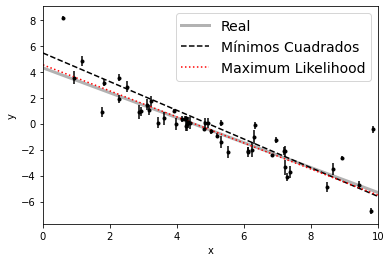

In [10]:
np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_ls, b_ls, np.log(0.001)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="Real")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="Mínimos Cuadrados")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":r", label="Maximum Likelihood")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

## Un modelo un poco más complicado

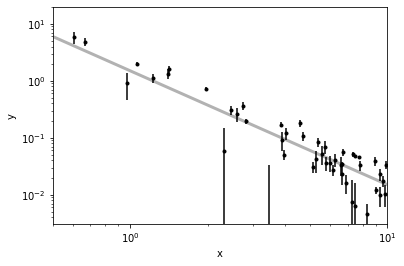

In [11]:
np.random.seed(124)

# Choose the "true" parameters.
a_true = 1.5
b_true = -2.0
f_true = 0.534 # Subestimación en los errores

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = (0.1 + 0.5 * np.random.rand(N) )/ x**2
y = a_true * x ** b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0.51, 10, 500)
plt.loglog(x0, a_true * x0 ** b_true, "k", alpha=0.3, lw=3)
plt.xlim(0.5, 10)
plt.xlabel("x")
plt.ylabel("y");

In [12]:
# Definimos nuestro modelo a ajustar a los datos

def fit_model2(x,*args):
    a = args[0]
    b = args[1]
    return a * x ** b

Estimación por mínimos cuadrados:
a = 2.077 ± 0.261
b = -2.157 ± 0.082


Text(0, 0.5, 'y')

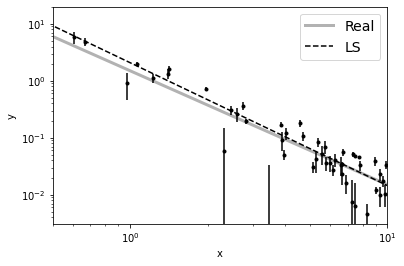

In [13]:
# Scipy.optimize.optimization usa Mínimos Cuadrados
import scipy.optimize as optimization

vpar, vcov = optimization.curve_fit(fit_model2,x,y,[1,1],yerr)

print("Estimación por mínimos cuadrados:")
print("a = {0:.3f} ± {1:.3f}".format(vpar[0], np.sqrt(vcov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(vpar[1], np.sqrt(vcov[1, 1])))

a_ls  = vpar[0]
da_ls = np.sqrt(cov[0, 0])
b_ls  = vpar[1]
db_ls = np.sqrt(cov[1, 1])

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.loglog(x0, fit_model2(x0,a_true,b_true), "k", alpha=0.3, lw=3, label="Real")
plt.loglog(x0, fit_model2(x0,a_ls,b_ls), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0.5, 10)
plt.xlabel("x")
plt.ylabel("y")

In [14]:
def log_likelihood2(theta, x, y, yerr):
    a, b, log_f = theta
    model = fit_model2(x,a,b)
    sigma2 = yerr ** 2 + model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Maximum likelihood estimates:
a = 1.815
b = -2.051
f = 0.495


Text(0, 0.5, 'y')

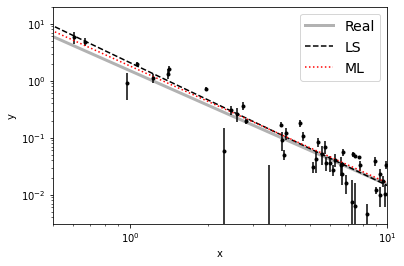

In [15]:
np.random.seed(42)
nll = lambda *args: -log_likelihood2(*args)
initial = np.array([a_ls, b_ls, np.log(0.001)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
a_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("a = {0:.3f}".format(a_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.loglog(x0, fit_model2(x0,a_true,b_true), "k", alpha=0.3, lw=3, label="Real")
plt.loglog(x0, fit_model2(x0,a_ls,b_ls), "--k", label="LS")
plt.loglog(x0, fit_model2(x0,a_ml,b_ml), ":r", label="ML")
plt.legend(fontsize=14)
plt.xlim(0.5, 10)
plt.xlabel("x")
plt.ylabel("y")